In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Define the folder paths
data_dir = 'data'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [12]:
# Define model hyperparameters
input_shape = (150, 150, 3)  # Adjust the input shape according to your dataset
num_classes = 2  # Cat and Dog
fc_size = 32
dropout_rate = 0.4

In [18]:
# Task 1: Data Preprocessing
def preprocess_data():
    # Data augmentation and normalization
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )
    
    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )
    
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical'
    )
    
    return train_generator, validation_generator, test_generator

In [4]:
# Task 2: Model Creation
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Flatten())
    
    model.add(Dense(fc_size, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [25]:
# Task 3: Model Training
def train_model(model, train_generator, validation_generator):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(train_generator, epochs=100, validation_data=validation_generator)  # Adjust the number of epochs as needed
    
    return history


In [6]:
# Task 4: Model Evaluation
def evaluate_model(model, test_generator):
    loss, accuracy = model.evaluate(test_generator)
    print('Loss: {:.4f}, Accuracy: {:.4f}'.format(loss, accuracy))


In [7]:
# Task 5: Plotting Training and Validation Accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

In [8]:
# Task 6: Plotting Training and Validation Loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

In [9]:
# Task 7: Classification Report
def print_classification_report(model, test_generator):
    # Use the predict() method to get the predicted labels for the test data
    y_pred_prob = model.predict(test_generator)
    
    # Convert the predicted probabilities to class indices
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # Get true labels
    y_test = test_generator.classes
    
    # Print the classification report
    print(classification_report(y_test, y_pred))

In [10]:
# Task 8: Confusion Matrix
def plot_confusion_matrix(model, test_generator):
    # Use the model to make predictions on the test data
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Get true labels
    y_test = test_generator.classes
    
    # Create the confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    # Create a list of class labels
    class_names = list(test_generator.class_indices.keys())

    # Create a heatmap of the confusion matrix
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    # Add labels and title
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

In [23]:
# Task 8: Saving the model
def save_model(model, filename):
    model.save(filename)


Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6951 - accuracy: 0.5312 - val_loss: 1.6345 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 1s 921ms/step - loss: 2.2246 - accuracy: 0.4062 - val_loss: 2.7877 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 1s 929ms/step - loss: 2.0305 - accuracy: 0.5000 - val_loss: 1.0583 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 1s 913ms/step - loss: 0.9619 - accuracy: 0.5312 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 1s 943ms/step - loss: 0.6904 - accuracy: 0.5312 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 1s 913ms/step - loss: 0.6875 - accuracy: 0.5312 - val_loss: 0.7044 - val_accuracy: 0.3750
Epoch 7/100
1/1 [=====================

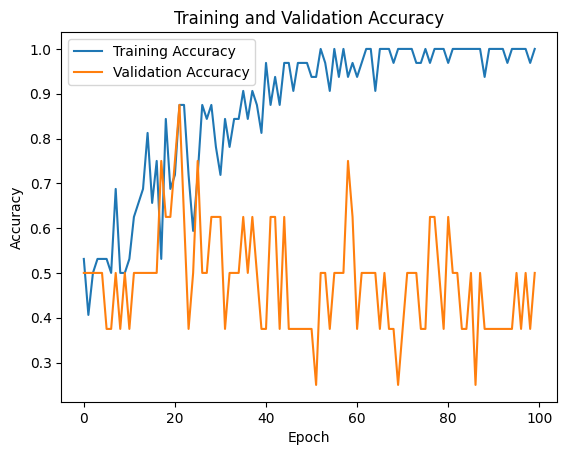

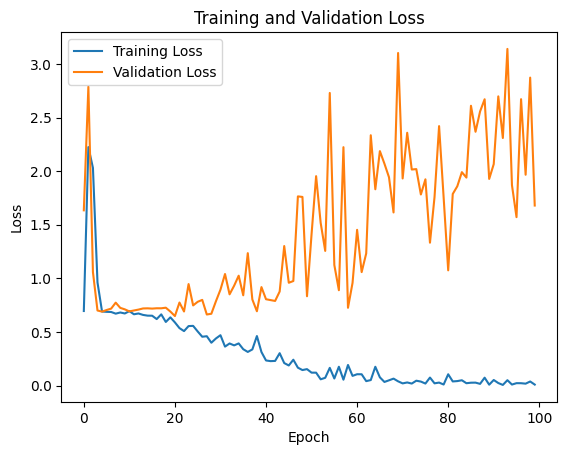

1/1 [==============================] - 0s 172ms/step
              precision    recall  f1-score   support

           0       0.33      0.30      0.32        10
           1       0.36      0.40      0.38        10

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20

1/1 [==============================] - 0s 132ms/step


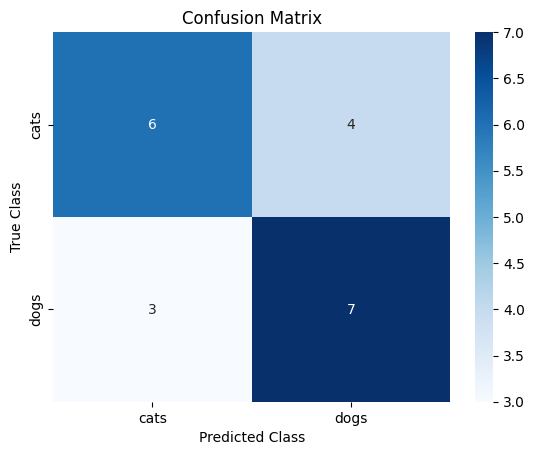

In [26]:
# Main function
def main():
    train_generator, validation_generator, test_generator = preprocess_data()
    model = create_model()
    history = train_model(model, train_generator, validation_generator)
    evaluate_model(model, test_generator)
    plot_accuracy(history)
    plot_loss(history)
    print_classification_report(model, test_generator)
    save_model(model, 'pet_classification_model.h5')
    plot_confusion_matrix(model, test_generator)

if __name__ == '__main__':
    main()
